# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=imperial&q="

Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date =[]
newcities = []
num = 1
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        Lat.append(response["coord"]['lat'])
        Lng.append(response["coord"]['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        print(f"Processing Record {num} | {city}")
        newcities.append(city)
        num+=1
    except KeyError:
        print("City not found. Skipping...")
        

Processing Record 1 | rikitea
Processing Record 2 | puerto varas
Processing Record 3 | nabire
Processing Record 4 | buin
Processing Record 5 | albany
Processing Record 6 | dikson
City not found. Skipping...
Processing Record 7 | jacareacanga
Processing Record 8 | victoria
Processing Record 9 | bathsheba
Processing Record 10 | norman wells
Processing Record 11 | vaini
Processing Record 12 | carnarvon
Processing Record 13 | hermanus
Processing Record 14 | qaanaaq
Processing Record 15 | punta arenas
Processing Record 16 | cabo san lucas
City not found. Skipping...
Processing Record 17 | butaritari
Processing Record 18 | sayansk
Processing Record 19 | longyearbyen
Processing Record 20 | atuona
Processing Record 21 | berlevag
Processing Record 22 | quanzhou
City not found. Skipping...
Processing Record 23 | nador
Processing Record 24 | codrington
Processing Record 25 | vila franca do campo
Processing Record 26 | waipawa
Processing Record 27 | arraial do cabo
Processing Record 28 | georgetow

Processing Record 226 | quatre cocos
Processing Record 227 | kawalu
Processing Record 228 | hithadhoo
Processing Record 229 | richards bay
City not found. Skipping...
Processing Record 230 | tupik
Processing Record 231 | ponta delgada
Processing Record 232 | aksay
Processing Record 233 | maraba
Processing Record 234 | manali
Processing Record 235 | ossora
Processing Record 236 | santiago del estero
Processing Record 237 | savannah bight
Processing Record 238 | weyburn
Processing Record 239 | talnakh
Processing Record 240 | takaka
Processing Record 241 | geraldton
City not found. Skipping...
City not found. Skipping...
Processing Record 242 | chifeng
Processing Record 243 | beaverlodge
City not found. Skipping...
Processing Record 244 | luderitz
Processing Record 245 | monywa
Processing Record 246 | itanagar
Processing Record 247 | high level
Processing Record 248 | izumo
Processing Record 249 | basar
Processing Record 250 | brive-la-gaillarde
Processing Record 251 | abu dhabi
Processin

Processing Record 451 | iranshahr
Processing Record 452 | teya
Processing Record 453 | mitsamiouli
Processing Record 454 | atambua
Processing Record 455 | balabac
Processing Record 456 | beringovskiy
Processing Record 457 | barkly west
Processing Record 458 | peterhead
Processing Record 459 | anshun
Processing Record 460 | ishinomaki
Processing Record 461 | fairbanks
Processing Record 462 | dingle
Processing Record 463 | zheleznodorozhnyy
Processing Record 464 | nishihara
Processing Record 465 | chapais
Processing Record 466 | barranca
Processing Record 467 | mercedes
Processing Record 468 | teguise
Processing Record 469 | misratah
Processing Record 470 | katsuura
Processing Record 471 | tombouctou
Processing Record 472 | blagoyevo
Processing Record 473 | gamba
Processing Record 474 | comodoro rivadavia
Processing Record 475 | porto santo
City not found. Skipping...
Processing Record 476 | cayenne
Processing Record 477 | magrath
Processing Record 478 | puerto narino
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
City_df = pd.DataFrame({"City":newcities,"Lat":Lat, "Lng":Lng,"Max Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,
                       "Wind Speed":Wind_Speed,"Country":Country,"Date":Date})

In [5]:
City_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [6]:
City_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,72.39,81,100,14.23,PF,1596005309
1,puerto varas,-41.32,-72.99,30.20,100,90,2.24,CL,1596005309
2,nabire,-3.37,135.48,83.71,72,100,1.70,ID,1596005310
3,buin,-33.73,-70.75,45.00,86,0,3.36,CL,1596005310
4,albany,42.60,-73.97,64.00,69,0,3.15,US,1596005033


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
City_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.00000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.027004,19.650662,68.97989,70.610294,47.450368,7.969118,1.596005e+09
std,34.418145,92.360410,14.70578,19.919053,40.388506,5.244786,7.354192e+01
min,-54.800000,-175.200000,23.00000,3.000000,0.000000,0.310000,1.596005e+09
25%,-8.480000,-64.690000,59.00000,60.000000,1.000000,4.147500,1.596005e+09
50%,24.405000,20.810000,70.86000,74.000000,40.000000,6.910000,1.596005e+09
75%,50.685000,106.430000,79.33000,86.000000,90.000000,11.325000,1.596005e+09
max,78.220000,179.320000,113.79000,100.000000,100.000000,33.800000,1.596005e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
H_index = City_df.index[City_df["Humidity"]>100]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = City_df.drop(H_index)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,72.39,81,100,14.23,PF,1596005309
1,puerto varas,-41.32,-72.99,30.20,100,90,2.24,CL,1596005309
2,nabire,-3.37,135.48,83.71,72,100,1.70,ID,1596005310
3,buin,-33.73,-70.75,45.00,86,0,3.36,CL,1596005310
4,albany,42.60,-73.97,64.00,69,0,3.15,US,1596005033


In [15]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
date = str(pd.Timestamp(clean_city_data.loc[2,"Date"],unit='s'))[0:10]

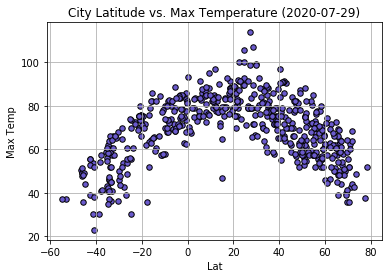

In [16]:
clean_city_data.plot(kind="scatter",x="Lat",y="Max Temp",color = "SlateBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

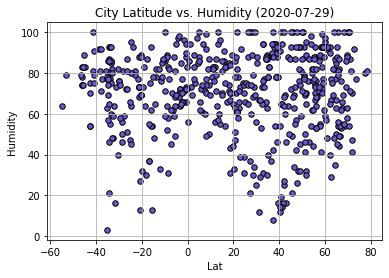

In [17]:
clean_city_data.plot(kind="scatter",x="Lat",y="Humidity",color = "SlateBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

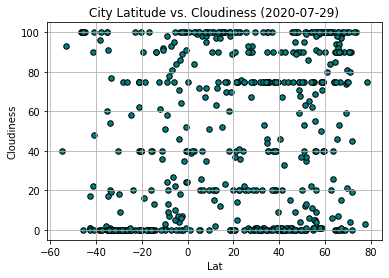

In [18]:
clean_city_data.plot(kind="scatter",x="Lat",y="Cloudiness",color = "Teal",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.savefig("../output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

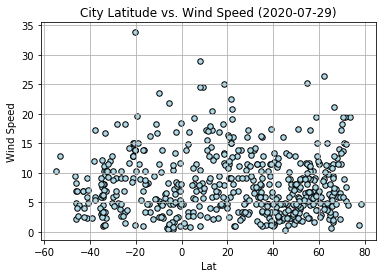

In [19]:
clean_city_data.plot(kind="scatter",x="Lat",y="Wind Speed", color = "LightBlue",grid=True,edgecolors='Black',s=30)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.savefig("output_data/Lat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_Re(df, x, y):
    x_value = df[x]
    y_value = df[y]
    correlation = st.pearsonr(x_value,y_value)
    print(f"The correlation between {x} and {y} is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_value,y_value)
    regress_value = x_value*slope+intercept
    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, "r-")
    line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
    plt.annotate(line_eq,(min(x_value),min(y_value)),fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{df.name} - {x} vs {y}")
    plt.savefig(f"output_data/{x}_vs_{y}_{df.name}.png")
    return plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
Northern = clean_city_data.loc[(clean_city_data["Lat"]>= 0)]
Northern.name = "Northern"
Southern = clean_city_data.loc[(clean_city_data["Lat"]<0)]
Southern.name = "Southern"

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Lat and Max Temp is -0.67


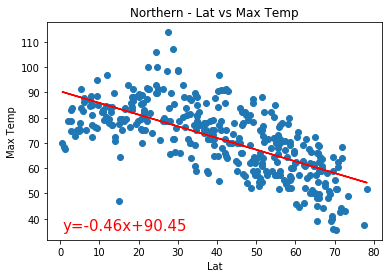

In [22]:
Linear_Re(Northern, "Lat", "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Lat and Max Temp is 0.76


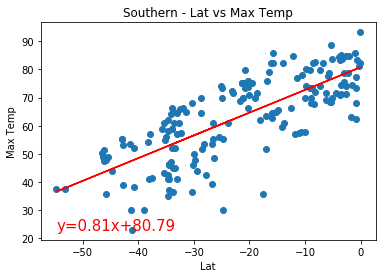

In [23]:
Linear_Re(Southern, "Lat", "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Lat and Humidity is -0.03


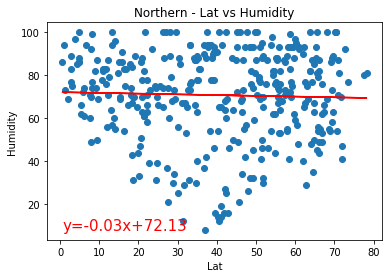

In [24]:
Linear_Re(Northern, "Lat", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Lat and Humidity is -0.02


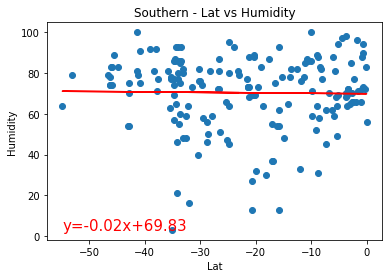

In [25]:
Linear_Re(Southern, "Lat", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Lat and Cloudiness is 0.01


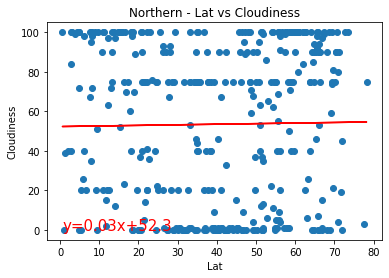

In [26]:
Linear_Re(Northern, "Lat", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Lat and Cloudiness is 0.06


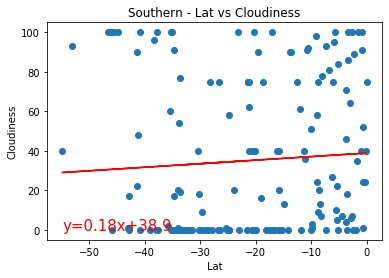

In [27]:
Linear_Re(Southern, "Lat", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Lat and Wind Speed is -0.1


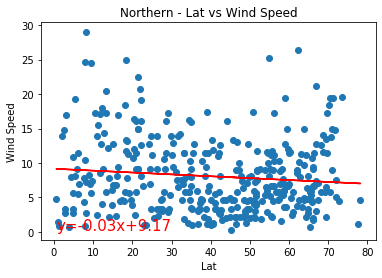

In [28]:
Linear_Re(Northern, "Lat", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Lat and Wind Speed is 0.01


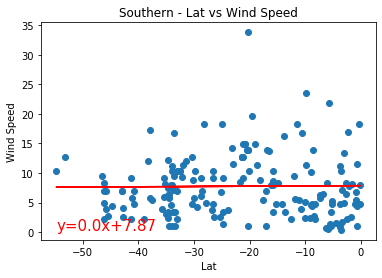

In [29]:
Linear_Re(Southern, "Lat", "Wind Speed")